In [1]:
%config InlineBackend.figure_format = 'retina'
import loompy
import scipy.sparse as sparse
import logging
import numpy as np
import matplotlib.pyplot as plt
import cytograph as cg
from tqdm import trange
_ = np.seterr(invalid='ignore')  # Ignore np.sqrt() warnings for zeros in long vectors
logging.getLogger().setLevel(logging.DEBUG)

2019-01-08 13:05:09,482 INFO: ERROR: failed to import igraph; some clustering methods will not work
/Users/stelin/anaconda53/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
2019-01-08 13:05:12,828 DEBUG: backend module://ipykernel.pylab.backend_inline version unknown


In [28]:
f = "/Users/stelin/build_20190101/L1_Cerebellum.agg.loom"
with loompy.connect(f) as dsagg:
    aa = cg.AutoAnnotator(root="/Users/stelin/code/auto-annotation/Human")
    aa.annotate_loom(dsagg)
    aa.save_in_loom(dsagg)
    tags = dsagg.ca.AutoAnnotation

In [29]:
_=[print(("*" if "HB-OTV" in x else " "),ix,x) for (ix,x) in enumerate(tags)]

  0 
  1 M-ERY
  2 NT-GABA
  3 NEUR,NT-GABA
  4 CB-PURK,NEUR
  5 CB-PURK,NEUR,NT-GABA
  6 CB-PURK,NEUR
  7 NBL,NEUR
  8 NBL,NEUR
  9 NBL,NEUR,NT-GABA
  10 NBL
  11 NBL,NEUR,NT-VGLUT2
  12 NBL,NEUR,NP-HCRT,NT-VGLUT2
  13 NEUR,NT-VGLUT2
  14 NBL,NEUR,NT-VGLUT2
* 15 HB-OTV,NBL,NEUR,NT-VGLUT2
* 16 HB-OTV,NBL,NEUR,NT-VGLUT2
* 17 CB-PURK,HB-OTV,NEUR,NT-VGLUT2
  18 P-VLGE,RGL,S-CC
  19 RGL
  20 RGL,S-CC,S-G1S
  21 RGL,S-CC,S-G1S,S-G2M
  22 RGL,S-CC,S-G1S,S-G2M
  23 S-CC,S-G1S
  24 
  25 NBL
  26 RGL
  27 NBL,NEUR
  28 NBL,S-CC,S-G2M
  29 RGL,S-CC,S-G2M
  30 NEUR,S-CC,S-G2M
  31 M-MGL,M-PVM,NP-POMC,S-CC
  32 M-MGL,M-PVM,S-CC
  33 M-MGL,M-PVM,NP-POMC,S-CC,S-G2M
  34 NEUR,S-CC
  35 M-ENDO,NEUR,S-CC



ambiguous
expected
pooled
spliced
spliced_exp
unspliced
unspliced_exp
velocity


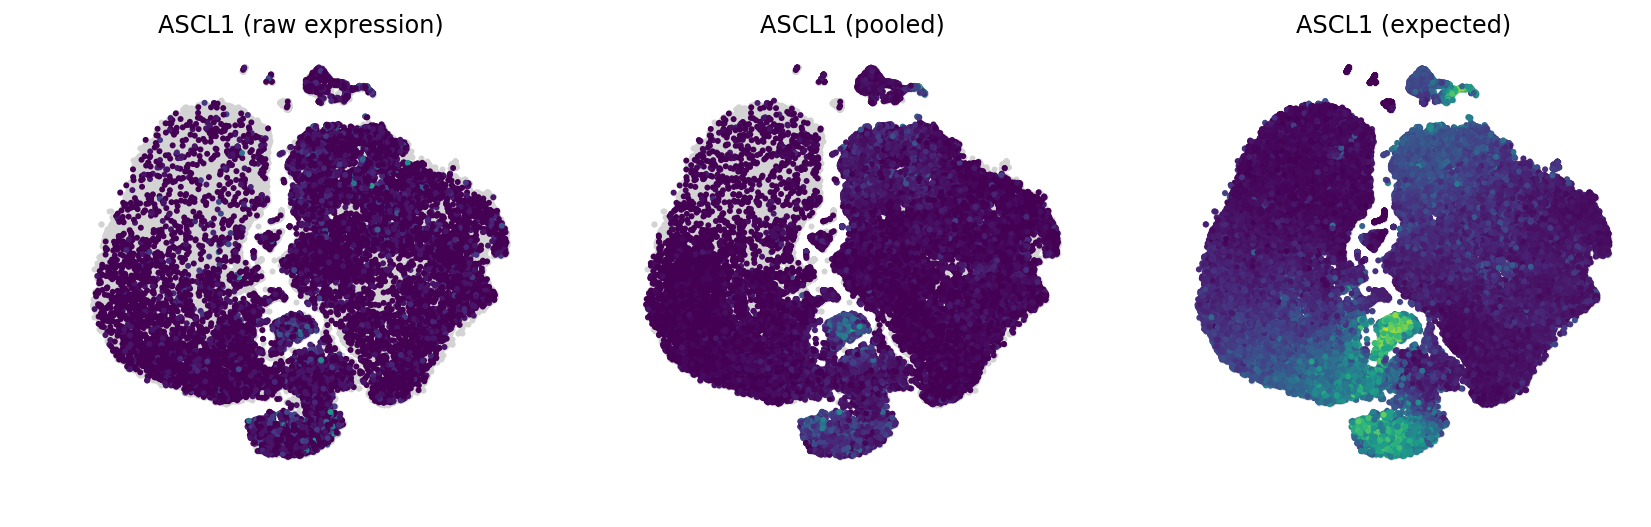

In [30]:
f = "/Users/stelin/build_20190101/L1_Cortex.loom"
with loompy.connect(f) as ds:
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    gene = "ASCL1"
    x = ds.ca.TSNE[:,0]
    y = ds.ca.TSNE[:,1]
    z = ds[ds.ra.Gene == gene, :][0,:]
    actb = z
    cells = z > 0
    plt.scatter(x,y,c="lightgrey",lw=0,marker='.')
    plt.scatter(x[cells], y[cells],c=z[cells],lw=0,marker='.')
    plt.title(gene + " (raw expression)")
    plt.axis("off")
    plt.subplot(132)
    z = ds["pooled"][ds.ra.Gene == gene, :][0,:]
    cells = z > 0
    plt.scatter(x,y,c="lightgrey",lw=0,marker='.')
    plt.scatter(x[cells], y[cells],c=z[cells],lw=0,marker='.')
    plt.title(gene + " (pooled)")
    plt.axis("off")
    plt.subplot(133)
    z = ds["spliced_exp"][ds.ra.Gene == gene, :][0,:]
    cells = z > 0
    plt.scatter(x,y,c="lightgrey",lw=0,marker='.')
    plt.scatter(x[cells], y[cells],c=z[cells],lw=0,marker='.')
    plt.title(gene + " (expected)")
    plt.axis("off")
    